In [1]:
import networkx as nx
import pandas as pd
import itertools
import os
import matplotlib.pyplot as plt  # Import correct de pyplot depuis Matplotlib

from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner")

nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

def extract_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

def nombre_mots_entre_mots(mots, mot1, mot2):
    if mot1 in mots and mot2 in mots:
        index_mot1 = mots.index(mot1)
        index_mot2 = mots.index(mot2)
        nombre_mots_entre = abs(index_mot2 - index_mot1) - 1
        return nombre_mots_entre
    else:
        return -1  # Si l'un des mots n'est pas trouvé

personnages: {'CLEON Ier--': ['CLEON Ier--', 'Cleon'], 'Empereur': ['Empereur'], 'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Cleon': ['Cleon', 'CLEON Ier--'], 'Eto Demerzel': ['Eto Demerzel', 'Demerzel'], 'Demerzel': ['Demerzel', 'Eto Demerzel']}
alias_non_existant: {'CLEON Ier--': ['CLEON Ier--', 'Cleon'], 'Empereur': ['Empereur'], 'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Eto Demerzel': ['Eto Demerzel', 'Demerzel']}
names1: CLEON Ier--;Cleon
names2: Empereur
names1: CLEON Ier--;Cleon
names2: Hari Seldon;Seldon
names1: CLEON Ier--;Cleon
names2: Eto Demerzel;Demerzel
names1: Empereur
names2: Hari Seldon;Seldon
names1: Empereur
names2: Eto Demerzel;Demerzel
names1: Hari Seldon;Seldon
names2: Eto Demerzel;Demerzel


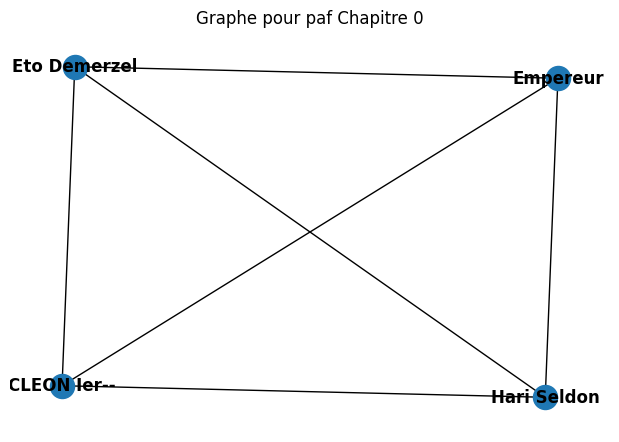

personnages: {'Cleon Ier': ['Cleon Ier'], 'Seldon': ['Seldon'], 'Marbie': ['Marbie'], 'Alem': ['Alem'], 'Hummin': ['Hummin']}
alias_non_existant: {'Cleon Ier': ['Cleon Ier'], 'Seldon': ['Seldon'], 'Marbie': ['Marbie'], 'Alem': ['Alem'], 'Hummin': ['Hummin']}
names1: Cleon Ier
names2: Seldon
names1: Cleon Ier
names2: Marbie
names1: Cleon Ier
names2: Alem
names1: Cleon Ier
names2: Hummin
names1: Marbie
names2: Alem
names1: Alem
names2: Hummin


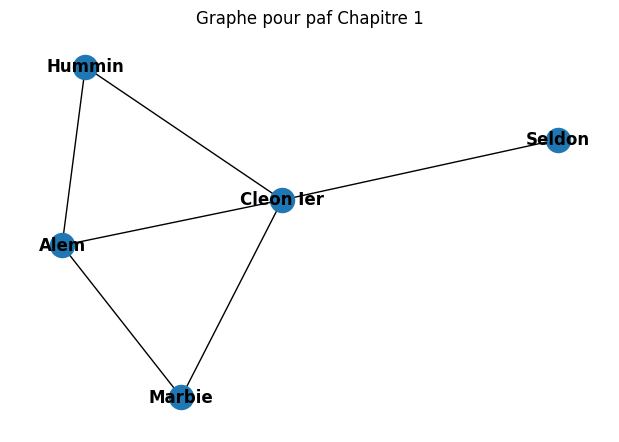

personnages: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Hummin': ['Hummin'], 'Seldon': ['Seldon', 'Hari Seldon']}
alias_non_existant: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Hummin': ['Hummin']}
names1: Hari Seldon;Seldon
names2: Hummin


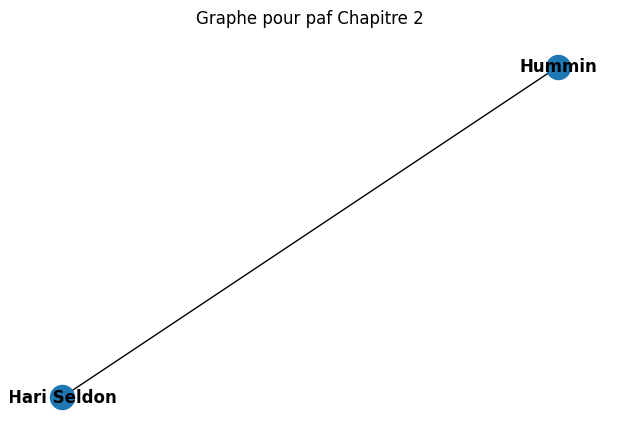

personnages: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Hummin': ['Hummin'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Demerzel': ['Demerzel']}
alias_non_existant: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Hummin': ['Hummin'], 'Demerzel': ['Demerzel']}
names1: Hari Seldon;Seldon
names2: Hummin
names1: Hari Seldon;Seldon
names2: Demerzel


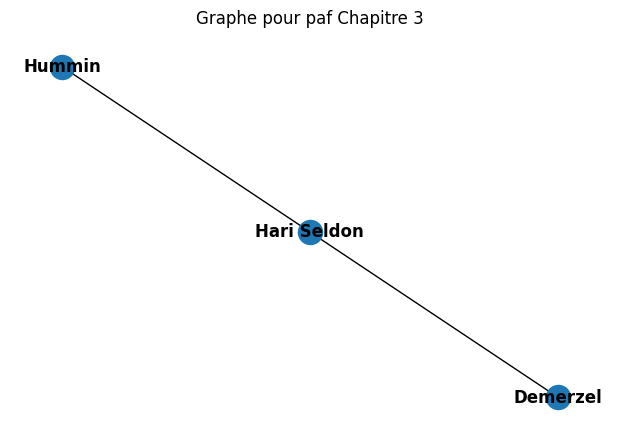

personnages: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Hummin': ['Hummin'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Lisung Randa': ['Lisung Randa', 'Randa'], 'Randa': ['Randa', 'Lisung Randa'], 'Dors': ['Dors']}
alias_non_existant: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Hummin': ['Hummin'], 'Lisung Randa': ['Lisung Randa', 'Randa'], 'Dors': ['Dors']}
names1: Hari Seldon;Seldon
names2: Hummin
names1: Hari Seldon;Seldon
names2: Lisung Randa;Randa
names1: Hari Seldon;Seldon
names2: Dors
names1: Hummin
names2: Lisung Randa;Randa
names1: Lisung Randa;Randa
names2: Dors


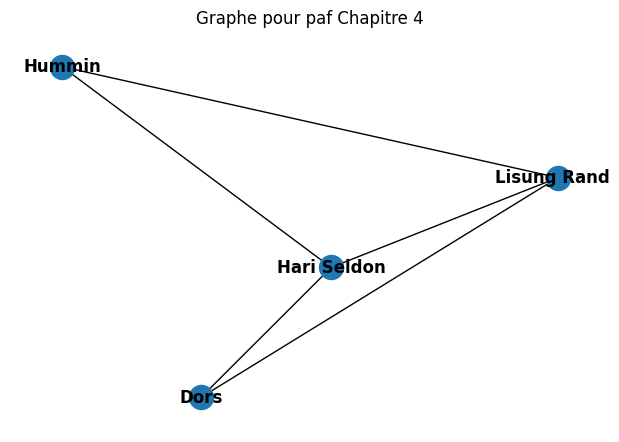

personnages: {'Seldon': ['Seldon', 'Hari Seldon'], 'Dors Venabili': ['Dors Venabili', 'Dors'], 'Jenarr Leggen': ['Jenarr Leggen', 'Leggen'], 'Hari Seldon': ['Hari Seldon', 'Seldon', 'Hari'], 'Heliconien': ['Heliconien'], 'Leggen': ['Leggen', 'Jenarr Leggen'], 'Dors': ['Dors', 'Dors Venabili'], 'Hari': ['Hari', 'Hari Seldon'], 'Clowzia': ['Clowzia']}
alias_non_existant: {'Seldon': ['Seldon', 'Hari Seldon'], 'Dors Venabili': ['Dors Venabili', 'Dors'], 'Jenarr Leggen': ['Jenarr Leggen', 'Leggen'], 'Heliconien': ['Heliconien'], 'Hari': ['Hari', 'Hari Seldon'], 'Clowzia': ['Clowzia']}
names1: Seldon;Hari Seldon
names2: Dors Venabili;Dors
names1: Seldon;Hari Seldon
names2: Jenarr Leggen;Leggen
names1: Seldon;Hari Seldon
names2: Heliconien
names1: Seldon;Hari Seldon
names2: Hari;Hari Seldon
names1: Dors Venabili;Dors
names2: Jenarr Leggen;Leggen
names1: Dors Venabili;Dors
names2: Heliconien
names1: Dors Venabili;Dors
names2: Hari;Hari Seldon
names1: Dors Venabili;Dors
names2: Clowzia
names1: 

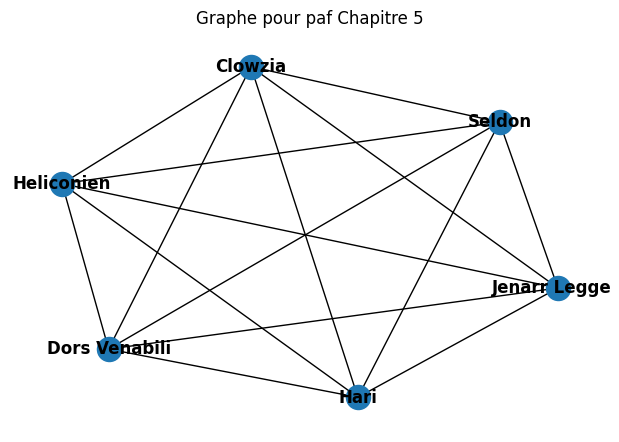

personnages: {'Seldon': ['Seldon'], 'Hummin': ['Hummin'], 'Eto Demerzel': ['Eto Demerzel'], 'Dors': ['Dors']}
alias_non_existant: {'Seldon': ['Seldon'], 'Hummin': ['Hummin'], 'Eto Demerzel': ['Eto Demerzel'], 'Dors': ['Dors']}
names1: Seldon
names2: Hummin
names1: Seldon
names2: Eto Demerzel
names1: Hummin
names2: Eto Demerzel
names1: Eto Demerzel
names2: Dors


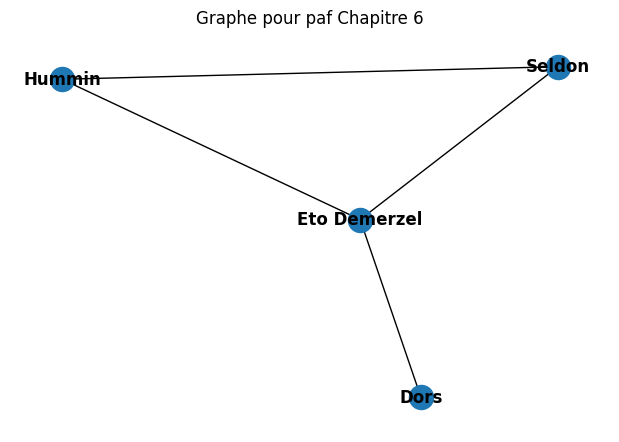

personnages: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Dors': ['Dors'], 'Endor Levanian': ['Endor Levanian', 'Levanian'], 'Levanian': ['Levanian', 'Endor Levanian']}
alias_non_existant: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Dors': ['Dors'], 'Endor Levanian': ['Endor Levanian', 'Levanian']}
names1: Hari Seldon;Seldon
names2: Dors
names1: Hari Seldon;Seldon
names2: Endor Levanian;Levanian
names1: Dors
names2: Endor Levanian;Levanian


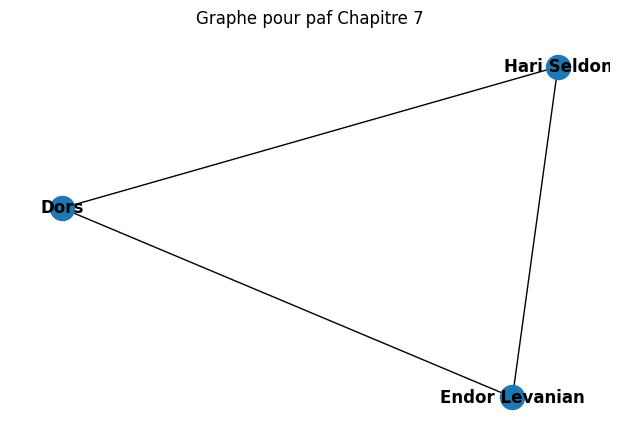

personnages: {'Mycogene': ['Mycogene'], 'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Grisnuage': ['Grisnuage'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Dors': ['Dors']}
alias_non_existant: {'Mycogene': ['Mycogene'], 'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Grisnuage': ['Grisnuage'], 'Dors': ['Dors']}
names1: Mycogene
names2: Hari Seldon;Seldon
names1: Mycogene
names2: Grisnuage
names1: Mycogene
names2: Dors
names1: Hari Seldon;Seldon
names2: Grisnuage
names1: Hari Seldon;Seldon
names2: Dors
names1: Grisnuage
names2: Dors


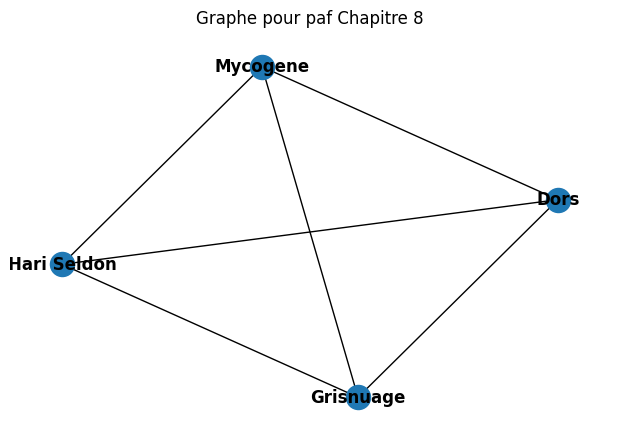

personnages: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Frere': ['Frere'], 'Mycogene': ['Mycogene']}
alias_non_existant: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Frere': ['Frere'], 'Mycogene': ['Mycogene']}
names1: Hari Seldon;Seldon
names2: Frere
names1: Hari Seldon;Seldon
names2: Mycogene
names1: Frere
names2: Mycogene


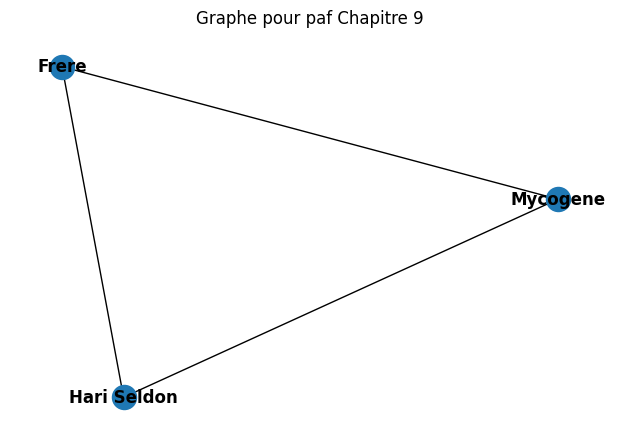

personnages: {}
alias_non_existant: {}


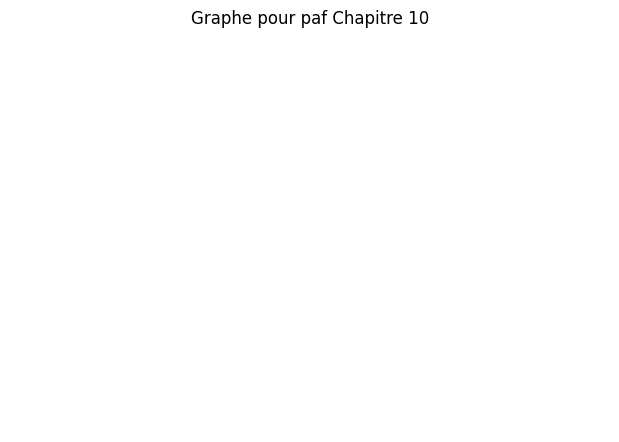

personnages: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Dors Venabili': ['Dors Venabili', 'Dors'], 'Dors': ['Dors', 'Dors Venabili']}
alias_non_existant: {'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Dors Venabili': ['Dors Venabili', 'Dors']}
names1: Hari Seldon;Seldon
names2: Dors Venabili;Dors


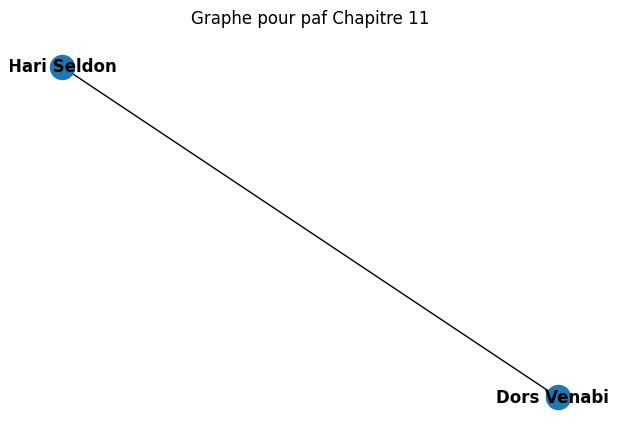

personnages: {'Hari Seldon': ['Hari Seldon', 'Seldon', 'L', 'l'], 'Seldon': ['Seldon', 'Hari Seldon', 'L', 'l'], 'L': ['L', 'Hari Seldon', 'Seldon', 'l', 'Demerzel', 'Cleon'], 'Empereur': ['Empereur', 'Empereurs'], 'l': ['l', 'Hari Seldon', 'Seldon', 'L', 'Demerzel', 'Cleon'], 'Demerzel': ['Demerzel', 'L', 'l'], 'Cleon': ['Cleon', 'L', 'l'], 'Empereurs': ['Empereurs', 'Empereur']}
alias_non_existant: {'Hari Seldon': ['Hari Seldon', 'Seldon', 'L', 'l'], 'Empereur': ['Empereur', 'Empereurs'], 'Demerzel': ['Demerzel', 'L', 'l'], 'Cleon': ['Cleon', 'L', 'l']}
names1: Hari Seldon;Seldon;L;l
names2: Empereur;Empereurs
names1: Hari Seldon;Seldon;L;l
names2: Demerzel;L;l
names1: Hari Seldon;Seldon;L;l
names2: Cleon;L;l
names1: Empereur;Empereurs
names2: Demerzel;L;l
names1: Empereur;Empereurs
names2: Cleon;L;l
names1: Demerzel;L;l
names2: Cleon;L;l


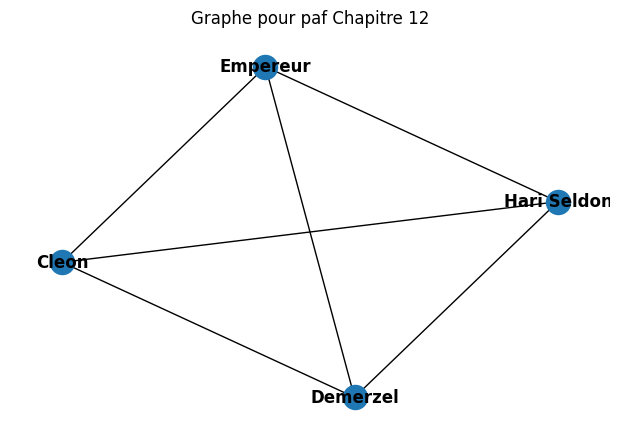

personnages: {'DAHL': ['DAHL'], 'Hari Seldon': ['Hari Seldon', 'Hari'], 'Dors Venabili': ['Dors Venabili', 'Dors'], 'Dors': ['Dors', 'Dors Venabili'], '-- Mere': ['-- Mere'], 'Hari': ['Hari', 'Hari Seldon']}
alias_non_existant: {'DAHL': ['DAHL'], 'Hari Seldon': ['Hari Seldon', 'Hari'], 'Dors Venabili': ['Dors Venabili', 'Dors'], '-- Mere': ['-- Mere']}
names1: DAHL
names2: Hari Seldon;Hari
names1: DAHL
names2: Dors Venabili;Dors
names1: DAHL
names2: -- Mere
names1: Hari Seldon;Hari
names2: Dors Venabili;Dors
names1: Hari Seldon;Hari
names2: -- Mere
names1: Dors Venabili;Dors
names2: -- Mere


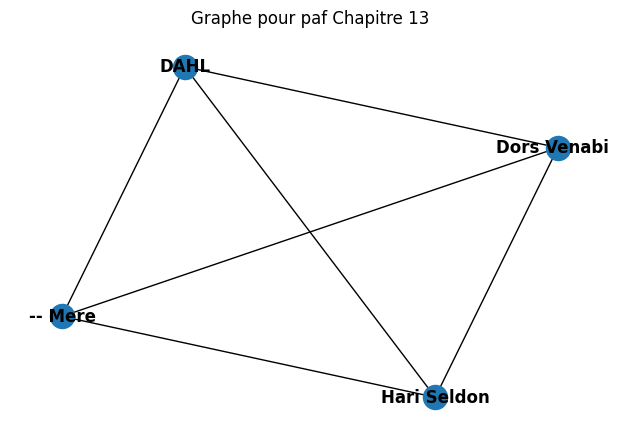

personnages: {'Davan': ['Davan'], 'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Dors Venabili': ['Dors Venabili', 'Dors'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Maitre Tisalver': ['Maitre Tisalver', 'Tisalver'], 'Maitresse Venabili': ['Maitresse Venabili', 'Maitresse'], 'Tisalver': ['Tisalver', 'Maitre Tisalver'], 'Maitresse': ['Maitresse', 'Maitresse Venabili'], 'Dors': ['Dors', 'Dors Venabili']}
alias_non_existant: {'Davan': ['Davan'], 'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Dors Venabili': ['Dors Venabili', 'Dors'], 'Maitre Tisalver': ['Maitre Tisalver', 'Tisalver'], 'Maitresse Venabili': ['Maitresse Venabili', 'Maitresse']}
names1: Davan
names2: Hari Seldon;Seldon
names1: Davan
names2: Dors Venabili;Dors
names1: Davan
names2: Maitre Tisalver;Tisalver
names1: Davan
names2: Maitresse Venabili;Maitresse
names1: Hari Seldon;Seldon
names2: Dors Venabili;Dors
names1: Hari Seldon;Seldon
names2: Maitre Tisalver;Tisalver
names1: Hari Seldon;Seldon
names2: Maitresse Venabili;Maitresse
names1

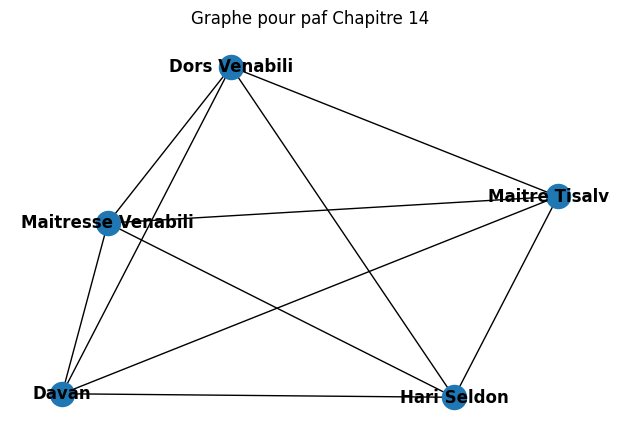

personnages: {'RAYCH': ['RAYCH', 'Raych'], 'Hari Seldon': ['Hari Seldon', 'Seldon', 'Hari'], 'Raych': ['Raych', 'RAYCH'], 'ALACT': ['ALACT'], 'Seldon': ['Seldon', 'Hari Seldon'], 'Dors': ['Dors'], 'Hari': ['Hari', 'Hari Seldon'], 'Maire': ['Maire'], 'Dahl': ['Dahl']}
alias_non_existant: {'RAYCH': ['RAYCH', 'Raych'], 'Hari Seldon': ['Hari Seldon', 'Seldon', 'Hari'], 'ALACT': ['ALACT'], 'Dors': ['Dors'], 'Maire': ['Maire'], 'Dahl': ['Dahl']}
names1: RAYCH;Raych
names2: Hari Seldon;Seldon;Hari
names1: RAYCH;Raych
names2: ALACT
names1: RAYCH;Raych
names2: Dors
names1: RAYCH;Raych
names2: Maire
names1: RAYCH;Raych
names2: Dahl
names1: Hari Seldon;Seldon;Hari
names2: ALACT
names1: Hari Seldon;Seldon;Hari
names2: Dors
names1: Hari Seldon;Seldon;Hari
names2: Maire
names1: Hari Seldon;Seldon;Hari
names2: Dahl
names1: ALACT
names2: Dors
names1: ALACT
names2: Maire
names1: ALACT
names2: Dahl


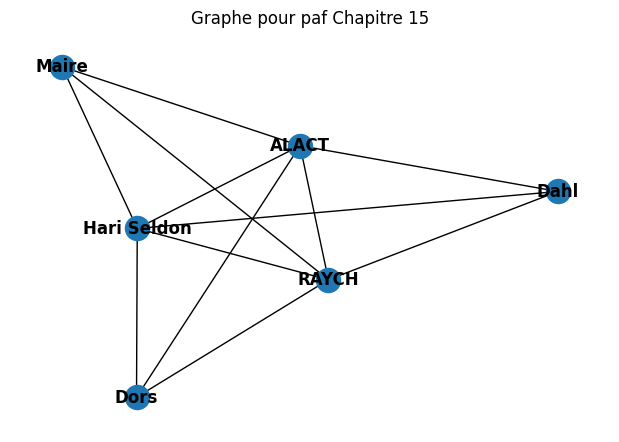

personnages: {'': ['', 's', 'Mannix IV', 'Mycogene', 'Seldon', 'Emmer Thalus', 'Hari Seldon', 'Thalus', 'Dors'], 's': ['s', '', 'Seldon', 'Emmer Thalus', 'Hari Seldon', 'Thalus', 'Dors'], 'Mannix IV': ['Mannix IV', ''], 'Mycogene': ['Mycogene', ''], 'Seldon': ['Seldon', '', 's', 'Hari Seldon'], 'Emmer Thalus': ['Emmer Thalus', '', 's', 'Thalus'], 'Hari Seldon': ['Hari Seldon', '', 's', 'Seldon'], 'Thalus': ['Thalus', '', 's', 'Emmer Thalus'], 'Dors': ['Dors', '', 's']}
alias_non_existant: {'': ['', 's', 'Mannix IV', 'Mycogene', 'Seldon', 'Emmer Thalus', 'Hari Seldon', 'Thalus', 'Dors']}


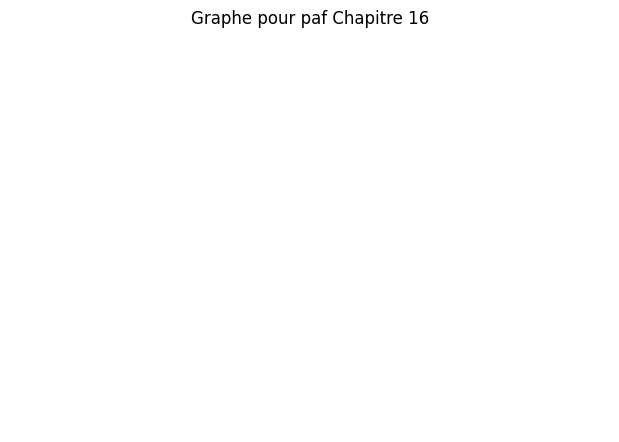

personnages: {'THALUS': ['THALUS'], 'Seldon': ['Seldon'], 'Dors Venabili': ['Dors Venabili', 'Dors'], 'Raych': ['Raych'], 'Maire a': ['Maire a'], 'Dors': ['Dors', 'Dors Venabili'], 'Hummin': ['Hummin']}
alias_non_existant: {'THALUS': ['THALUS'], 'Seldon': ['Seldon'], 'Dors Venabili': ['Dors Venabili', 'Dors'], 'Raych': ['Raych'], 'Maire a': ['Maire a'], 'Hummin': ['Hummin']}
names1: THALUS
names2: Seldon
names1: THALUS
names2: Dors Venabili;Dors
names1: THALUS
names2: Raych
names1: THALUS
names2: Maire a
names1: THALUS
names2: Hummin
names1: Seldon
names2: Dors Venabili;Dors
names1: Seldon
names2: Maire a
names1: Dors Venabili;Dors
names2: Raych
names1: Dors Venabili;Dors
names2: Maire a
names1: Dors Venabili;Dors
names2: Hummin
names1: Raych
names2: Maire a
names1: Maire a
names2: Hummin


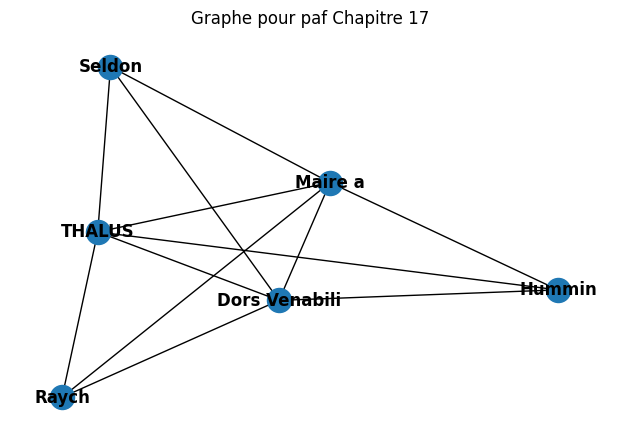

personnages: {'Dors SELDON': ['Dors SELDON', 'Seldon'], 'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Raych Seldon': ['Raych Seldon', 'Seldon'], 'Seldon': ['Seldon', 'Dors SELDON', 'Hari Seldon', 'Raych Seldon'], 'Hummin': ['Hummin'], 'Mere Rittah': ['Mere Rittah']}
alias_non_existant: {'Dors SELDON': ['Dors SELDON', 'Seldon'], 'Hari Seldon': ['Hari Seldon', 'Seldon'], 'Raych Seldon': ['Raych Seldon', 'Seldon'], 'Hummin': ['Hummin'], 'Mere Rittah': ['Mere Rittah']}
names1: Dors SELDON;Seldon
names2: Hari Seldon;Seldon
names1: Dors SELDON;Seldon
names2: Raych Seldon;Seldon
names1: Dors SELDON;Seldon
names2: Hummin
names1: Dors SELDON;Seldon
names2: Mere Rittah
names1: Hari Seldon;Seldon
names2: Raych Seldon;Seldon
names1: Hari Seldon;Seldon
names2: Hummin
names1: Hari Seldon;Seldon
names2: Mere Rittah
names1: Raych Seldon;Seldon
names2: Hummin
names1: Raych Seldon;Seldon
names2: Mere Rittah
names1: Hummin
names2: Mere Rittah


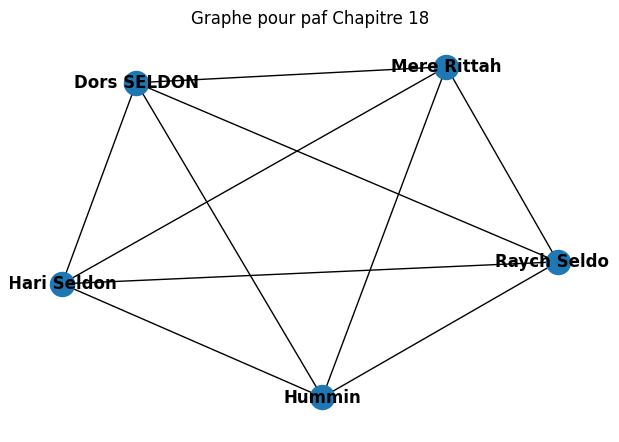

personnages: {'Simpson': ['Simpson'], 'R. Sammy': ['R. Sammy'], 'Vince Barrett': ['Vince Barrett', 'Vince'], 'Vince': ['Vince', 'Vince Barrett'], 'Baley': ['Baley'], 'JULIUS ENDERBY': ['JULIUS ENDERBY', 'Enderby'], 'Enderby': ['Enderby', 'JULIUS ENDERBY']}
alias_non_existant: {'Simpson': ['Simpson'], 'R. Sammy': ['R. Sammy'], 'Vince Barrett': ['Vince Barrett', 'Vince'], 'Baley': ['Baley'], 'JULIUS ENDERBY': ['JULIUS ENDERBY', 'Enderby']}
names1: Simpson
names2: R. Sammy
names1: Simpson
names2: Vince Barrett;Vince
names1: Simpson
names2: Baley
names1: Simpson
names2: JULIUS ENDERBY;Enderby
names1: R. Sammy
names2: Vince Barrett;Vince
names1: R. Sammy
names2: Baley
names1: R. Sammy
names2: JULIUS ENDERBY;Enderby
names1: Vince Barrett;Vince
names2: Baley
names1: Vince Barrett;Vince
names2: JULIUS ENDERBY;Enderby
names1: Baley
names2: JULIUS ENDERBY;Enderby


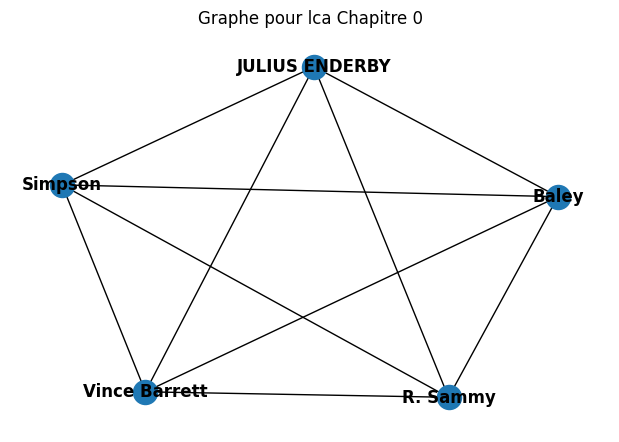

personnages: {}
alias_non_existant: {}


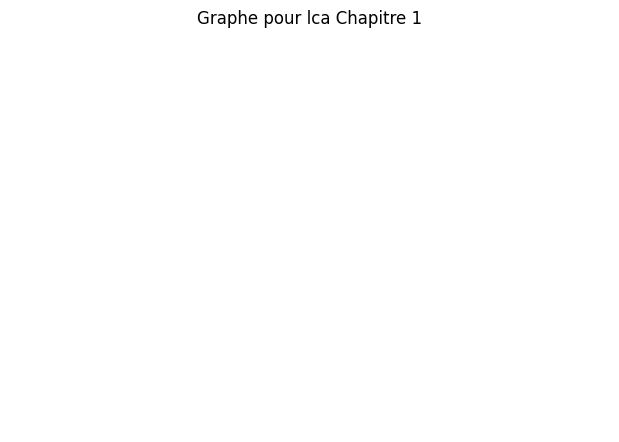

personnages: {'Baley': ['Baley'], 'R. Daneel': ['R. Daneel']}
alias_non_existant: {'Baley': ['Baley'], 'R. Daneel': ['R. Daneel']}
names1: Baley
names2: R. Daneel


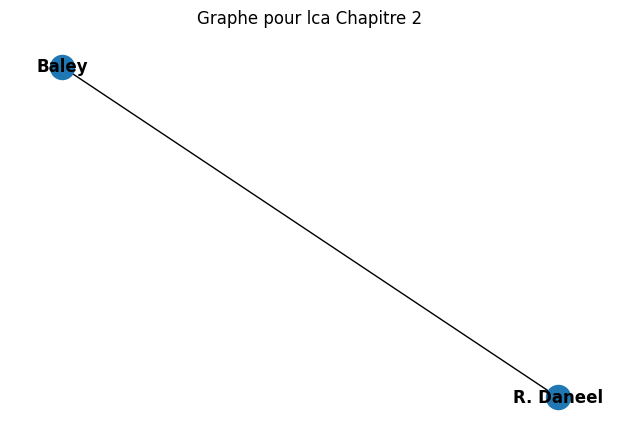

personnages: {'Baley': ['Baley'], 'Elijah': ['Elijah']}
alias_non_existant: {'Baley': ['Baley'], 'Elijah': ['Elijah']}
names1: Baley
names2: Elijah


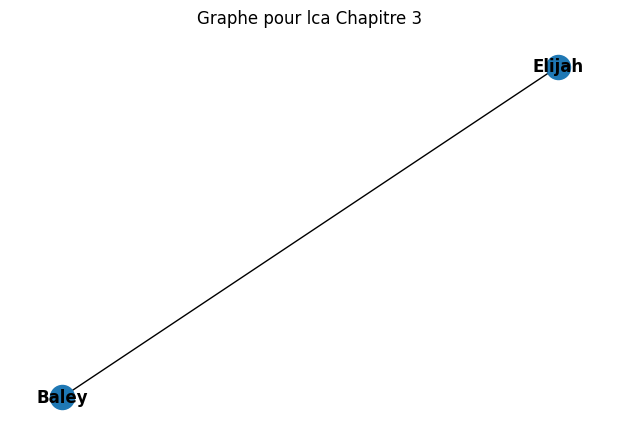

personnages: {'Jessie': ['Jessie'], 'R. Daneel': ['R. Daneel', 'Daneel'], 'Olivaw': ['Olivaw'], 'Ben': ['Ben'], 'Baley': ['Baley'], 'Daneel': ['Daneel', 'R. Daneel'], 'Elijah': ['Elijah']}
alias_non_existant: {'Jessie': ['Jessie'], 'R. Daneel': ['R. Daneel', 'Daneel'], 'Olivaw': ['Olivaw'], 'Ben': ['Ben'], 'Baley': ['Baley'], 'Elijah': ['Elijah']}
names1: Jessie
names2: R. Daneel;Daneel
names1: R. Daneel;Daneel
names2: Olivaw
names1: R. Daneel;Daneel
names2: Ben
names1: R. Daneel;Daneel
names2: Baley
names1: R. Daneel;Daneel
names2: Elijah
names1: Olivaw
names2: Ben


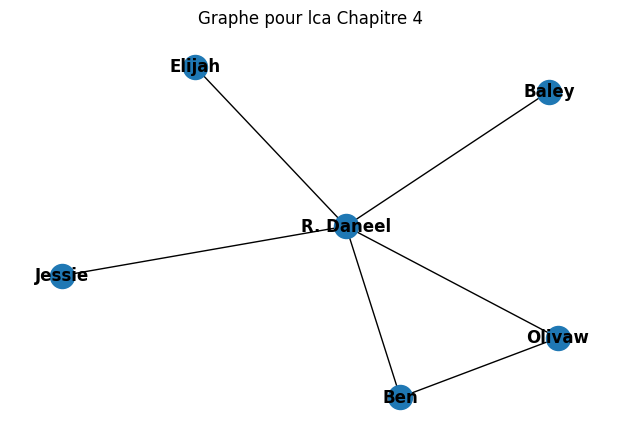

personnages: {'Elijah Baley': ['Elijah Baley', 'Baley'], 'Jessie': ['Jessie'], 'R. Daneel Olivaw': ['R. Daneel Olivaw'], 'Baley': ['Baley', 'Elijah Baley'], 'Lije': ['Lije']}
alias_non_existant: {'Elijah Baley': ['Elijah Baley', 'Baley'], 'Jessie': ['Jessie'], 'R. Daneel Olivaw': ['R. Daneel Olivaw'], 'Lije': ['Lije']}
names1: Elijah Baley;Baley
names2: Jessie
names1: Elijah Baley;Baley
names2: R. Daneel Olivaw
names1: Elijah Baley;Baley
names2: Lije
names1: Jessie
names2: R. Daneel Olivaw
names1: R. Daneel Olivaw
names2: Lije


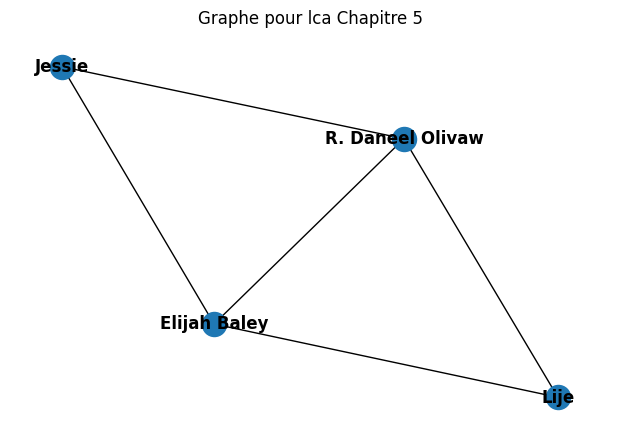

personnages: {'Daneel': ['Daneel', 'R. Daneel'], 'Lije': ['Lije'], 'R. Sammy': ['R. Sammy'], 'R. Daneel': ['R. Daneel', 'Daneel'], 'Enderby': ['Enderby'], 'Baley': ['Baley']}
alias_non_existant: {'Daneel': ['Daneel', 'R. Daneel'], 'Lije': ['Lije'], 'R. Sammy': ['R. Sammy'], 'Enderby': ['Enderby'], 'Baley': ['Baley']}
names1: Daneel;R. Daneel
names2: Lije
names1: Daneel;R. Daneel
names2: R. Sammy
names1: Lije
names2: R. Sammy
names1: Lije
names2: Enderby
names1: Lije
names2: Baley
names1: R. Sammy
names2: Enderby
names1: R. Sammy
names2: Baley
names1: Enderby
names2: Daneel;R. Daneel
names1: Baley
names2: Daneel;R. Daneel


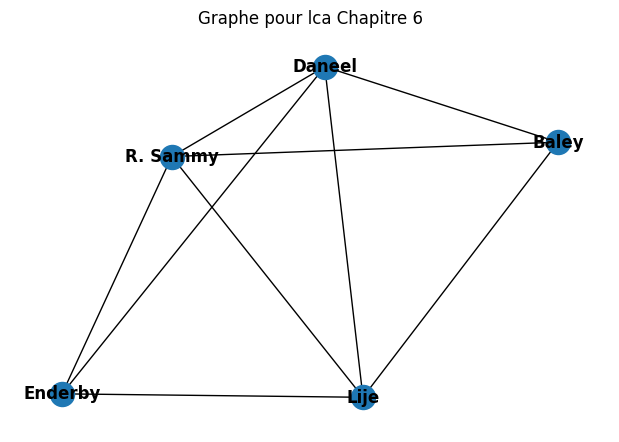

personnages: {'Enderby': ['Enderby'], 'Dr Sarton': ['Dr Sarton'], 'R. Daneel': ['R. Daneel'], 'Julius': ['Julius'], 'Lije': ['Lije'], 'Baley': ['Baley']}
alias_non_existant: {'Enderby': ['Enderby'], 'Dr Sarton': ['Dr Sarton'], 'R. Daneel': ['R. Daneel'], 'Julius': ['Julius'], 'Lije': ['Lije'], 'Baley': ['Baley']}
names1: Enderby
names2: Dr Sarton
names1: Enderby
names2: R. Daneel
names1: Dr Sarton
names2: R. Daneel
names1: Dr Sarton
names2: Julius
names1: Dr Sarton
names2: Lije
names1: Dr Sarton
names2: Baley
names1: R. Daneel
names2: Julius
names1: R. Daneel
names2: Lije
names1: R. Daneel
names2: Baley


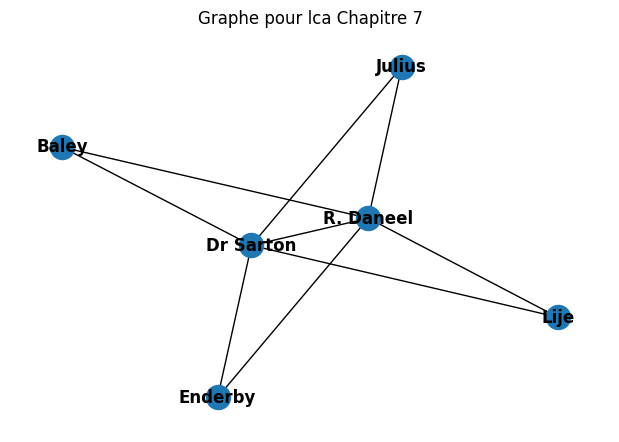

personnages: {'R. Daneel': ['R. Daneel'], 'Baley': ['Baley'], 'Dr Fastolfe': ['Dr Fastolfe'], 'Lije': ['Lije']}
alias_non_existant: {'R. Daneel': ['R. Daneel'], 'Baley': ['Baley'], 'Dr Fastolfe': ['Dr Fastolfe'], 'Lije': ['Lije']}
names1: R. Daneel
names2: Baley
names1: R. Daneel
names2: Dr Fastolfe
names1: R. Daneel
names2: Lije
names1: Baley
names2: Dr Fastolfe
names1: Dr Fastolfe
names2: Lije


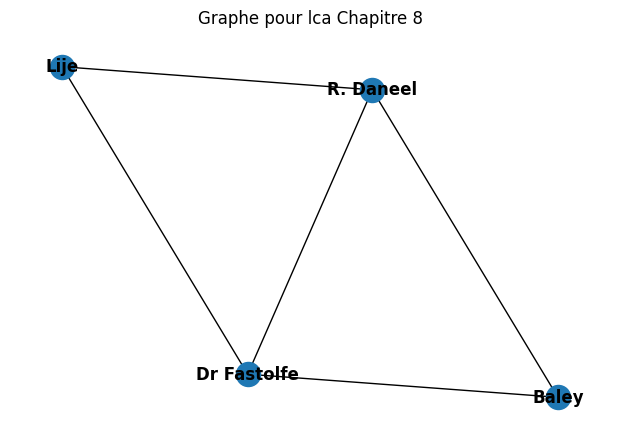

personnages: {'R. Daneel': ['R. Daneel'], 'Baley': ['Baley'], 'Trinite': ['Trinite']}
alias_non_existant: {'R. Daneel': ['R. Daneel'], 'Baley': ['Baley'], 'Trinite': ['Trinite']}
names1: R. Daneel
names2: Baley
names1: R. Daneel
names2: Trinite
names1: Baley
names2: Trinite


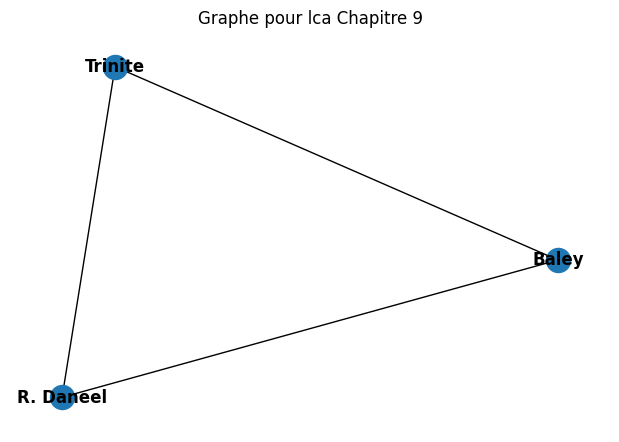

personnages: {'Baley': ['Baley'], 'R. Daneel': ['R. Daneel']}
alias_non_existant: {'Baley': ['Baley'], 'R. Daneel': ['R. Daneel']}
names1: Baley
names2: R. Daneel


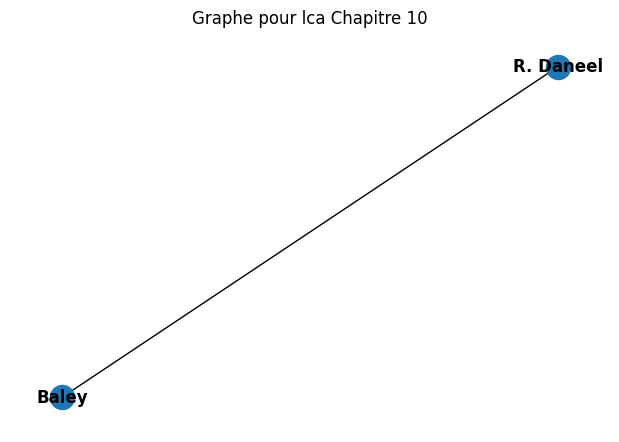

personnages: {'R. Sammy': ['R. Sammy'], 'Lije': ['Lije'], 'Baley': ['Baley'], 'Enderby': ['Enderby'], 'Julius': ['Julius'], 'A. Gerrigel': ['A. Gerrigel']}
alias_non_existant: {'R. Sammy': ['R. Sammy'], 'Lije': ['Lije'], 'Baley': ['Baley'], 'Enderby': ['Enderby'], 'Julius': ['Julius'], 'A. Gerrigel': ['A. Gerrigel']}
names1: R. Sammy
names2: Lije
names1: R. Sammy
names2: Baley
names1: R. Sammy
names2: Enderby
names1: R. Sammy
names2: Julius
names1: R. Sammy
names2: A. Gerrigel
names1: Lije
names2: Baley
names1: Lije
names2: Enderby
names1: Lije
names2: Julius
names1: Lije
names2: A. Gerrigel
names1: Baley
names2: Julius
names1: Baley
names2: A. Gerrigel
names1: Enderby
names2: Julius
names1: Enderby
names2: A. Gerrigel
names1: Julius
names2: A. Gerrigel


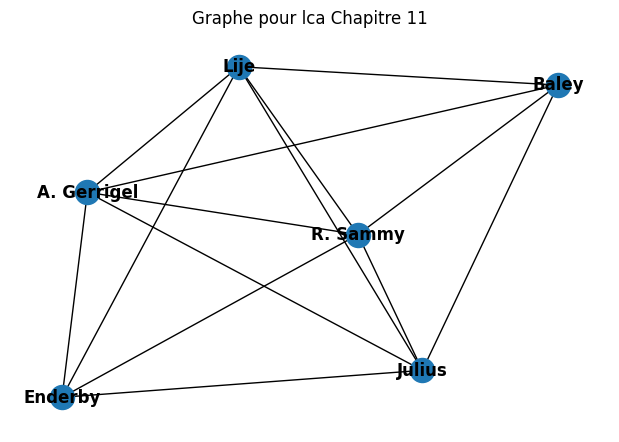

personnages: {}
alias_non_existant: {}


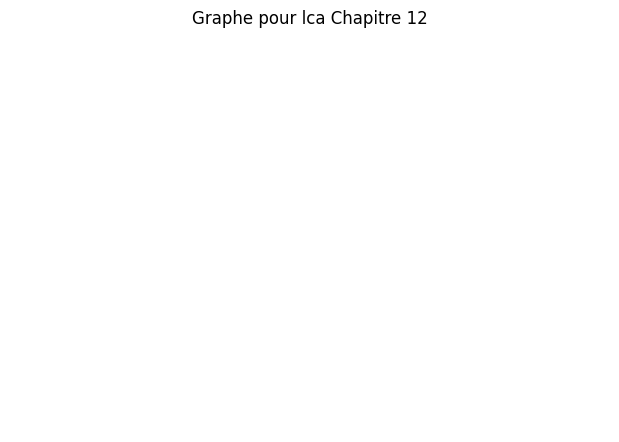

personnages: {'Baley': ['Baley'], 'R. Daneel': ['R. Daneel', 'Daneel'], 'Daneel': ['Daneel', 'R. Daneel'], 'Jessie': ['Jessie'], 'Lije': ['Lije']}
alias_non_existant: {'Baley': ['Baley'], 'R. Daneel': ['R. Daneel', 'Daneel'], 'Jessie': ['Jessie'], 'Lije': ['Lije']}
names1: Baley
names2: R. Daneel;Daneel
names1: R. Daneel;Daneel
names2: Jessie
names1: R. Daneel;Daneel
names2: Lije
names1: Jessie
names2: Lije


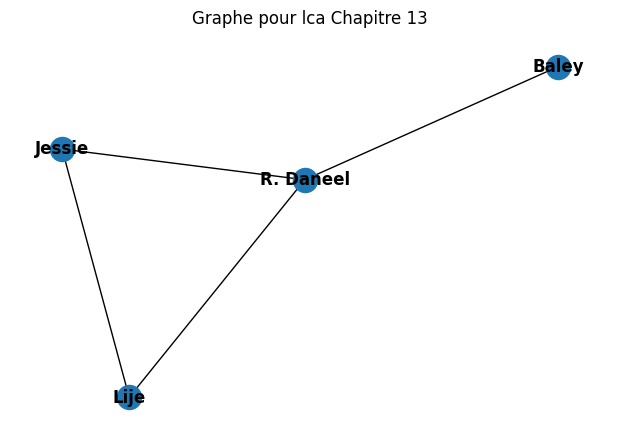

personnages: {}
alias_non_existant: {}


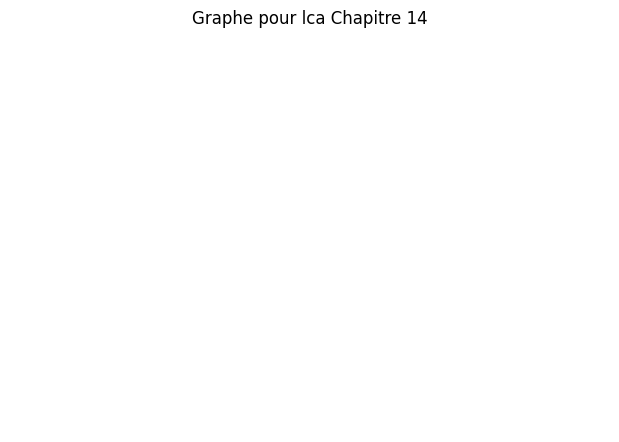

personnages: {'R. Daneel': ['R. Daneel', 'Daneel'], 'Francis': ['Francis'], 'Clousarr': ['Clousarr'], 'Baley': ['Baley'], 'Daneel': ['Daneel', 'R. Daneel']}
alias_non_existant: {'R. Daneel': ['R. Daneel', 'Daneel'], 'Francis': ['Francis'], 'Clousarr': ['Clousarr'], 'Baley': ['Baley']}
names1: R. Daneel;Daneel
names2: Francis
names1: R. Daneel;Daneel
names2: Clousarr
names1: R. Daneel;Daneel
names2: Baley
names1: Francis
names2: Clousarr
names1: Francis
names2: Baley


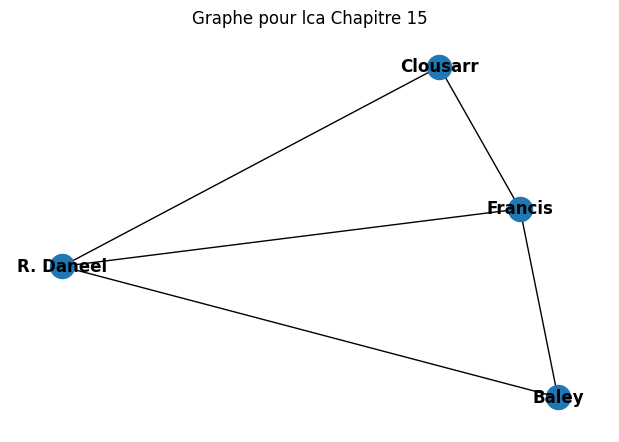

personnages: {'Baley': ['Baley'], 'R. Daneel': ['R. Daneel']}
alias_non_existant: {'Baley': ['Baley'], 'R. Daneel': ['R. Daneel']}
names1: Baley
names2: R. Daneel


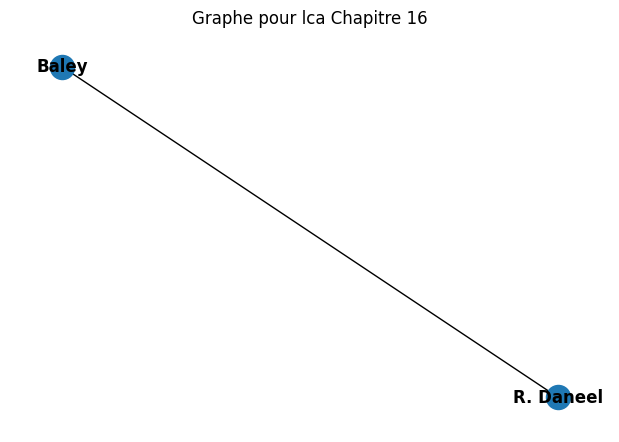

personnages: {'Enderby': ['Enderby'], 'Clousarr': ['Clousarr'], 'Baley': ['Baley'], 'R. Sammy': ['R. Sammy'], 'Dr Sarton': ['Dr Sarton'], 'Lije': ['Lije']}
alias_non_existant: {'Enderby': ['Enderby'], 'Clousarr': ['Clousarr'], 'Baley': ['Baley'], 'R. Sammy': ['R. Sammy'], 'Dr Sarton': ['Dr Sarton'], 'Lije': ['Lije']}
names1: Enderby
names2: Clousarr
names1: Enderby
names2: Baley
names1: Enderby
names2: R. Sammy
names1: Enderby
names2: Dr Sarton
names1: Enderby
names2: Lije
names1: Clousarr
names2: Baley
names1: Clousarr
names2: R. Sammy
names1: Clousarr
names2: Dr Sarton
names1: Clousarr
names2: Lije
names1: Baley
names2: R. Sammy
names1: Baley
names2: Dr Sarton
names1: Baley
names2: Lije
names1: R. Sammy
names2: Dr Sarton
names1: R. Sammy
names2: Lije
names1: Dr Sarton
names2: Lije


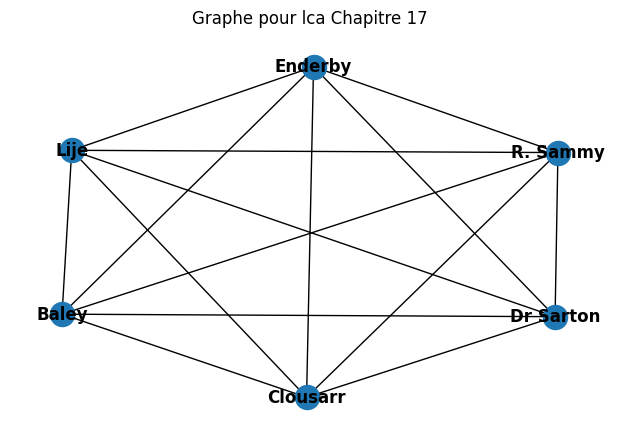

In [3]:
from unidecode import unidecode

# Initialisation des livres et chapitres
books = [
    (list(range(1, 20)), "paf"),
    (list(range(1, 19)), "lca"),
]

df_dict = {"ID": [], "graphml": []}

for chapters, book_code in books:
    if book_code == 'paf':
        folder_path = r'C:\Users\etudiant\Documents\NER_cam\prelude_a_fondation'
    else:
        folder_path = r'C:\Users\etudiant\Documents\NER_cam\les_cavernes_d_acier'

    for chapter in chapters:
        file_path = os.path.join(folder_path, f"chapter_{chapter}.txt.preprocessed")
        if os.path.exists(file_path):
            text = extract_text_from_file(file_path)
            entities = nlp(text)  # Votre traitement NLP ici
            ner = [entity['word'] for entity in entities if entity['entity_group'] == 'PER']
            listremove=["Goutte-de-Pluie Quarante-trois","Goutte-de-Pluie Quarante-cinq","Mycélium Soixante-douze","Trantor"]
            for val in listremove:

                while val in ner:
                    ner.remove(val)
            mots = text.split()

            G = nx.Graph()
            combinations = list(itertools.combinations(ner, 2))

            personnages = {}  # Dictionnaire pour regrouper les personnages et leurs alias

            for n in combinations:
                all_allias0 = []
                all_allias1 = []
                if n[0] != n[1]:
                    if nombre_mots_entre_mots(mots, n[0], n[1]) < 25:
                        #G.add_edge(unidecode(n[0]), unidecode(n[1]))

                        # Votre logique pour identifier les alias de manière adéquate
                        for alias in ner:
                            alias_unaccented = unidecode(alias)
                            n0_unaccented = unidecode(n[0])

                            if len(alias_unaccented) > len(n0_unaccented):
                                a = alias_unaccented
                                b = n0_unaccented
                            else:
                                a = n0_unaccented
                                b = alias_unaccented

                            if a.lower().find(b.lower()) != -1:
                                all_allias0.append(alias)
                        for alias in ner:
                            alias_unaccented = unidecode(alias)
                            n1_unaccented = unidecode(n[1])

                            if len(alias_unaccented) > len(n1_unaccented):
                                a = alias_unaccented
                                b = n1_unaccented
                            else:
                                a = n1_unaccented
                                b = alias_unaccented

                            if a.lower().find(b.lower()) != -1:
                                all_allias1.append(alias)


                        # Mettez à jour le dictionnaire des personnages avec les alias correspondants
                        if unidecode(n[0]) not in personnages:
                            personnages[unidecode(n[0])] = [unidecode(n[0])]
                        if unidecode(n[1]) not in personnages:
                            personnages[unidecode(n[1])] = [unidecode(n[1])]

                        for alias in all_allias0:
                            if unidecode(alias) not in personnages[unidecode(n[0])]:
                                personnages[unidecode(n[0])].append(unidecode(alias))

                        for alias in all_allias1:
                            if unidecode(alias) not in personnages[unidecode(n[1])]:
                                personnages[unidecode(n[1])].append(unidecode(alias))

            #for personnage, alias_list in personnages.items():
            # ... (votre code précédent)

            """for personnage, alias_list in personnages.items():
                names = ';'.join(map(str, alias_list))
                G.add_node(personnage, names=names)
                """

            # Calcul et ajout des arêtes en fonction de la distance entre les clés
            print(f"personnages: {personnages}")
            alias_non_existant = {}

            allal=[]
            for personnage, alias in personnages.items():
                #print(personnage)
                #print(allal)
                if personnage not in allal:
                    # Vérifier si la valeur n'est pas dans les valeurs
                    #if personnage not in personnages.values():
                    alias_non_existant[personnage] = alias
                    allal=allal+alias

            print(f"alias_non_existant: {alias_non_existant}")

            # Calcul et ajout des arêtes en fonction de la distance entre les clés
                
            for key1, aliases1 in alias_non_existant.items():
                for key2, aliases2 in alias_non_existant.items():
                    #print(f'aliasssssssssss:{aliases2}')
                    if key1 != key2 :  # Vérifiez la condition
                        # Calcul de la distance entre les clés
                        # Vous devez implémenter votre propre logique pour calculer cette distance
                        # Supposons que la fonction nombre_mots_entre_mots() calcule la distance entre les clés
                        for a1 in aliases1:
                            for a2 in aliases2:

                                distance = nombre_mots_entre_mots(mots, a1, a2)

                                if distance < 50:
                                    if not G.has_edge(key1, key2):  # Vérifiez si l'arête existe déjà
                                        G.add_edge(key1, key2)
                                        # Ajoute l'arête entre les clés si la distance est inférieure à 15
                                            
                                        # Mettre à jour les attributs des nœuds
                                        names1=';'.join(map(str, personnages[key1]))
                                        names2=';'.join(map(str, personnages[key2]))
                                        G.nodes[key1]['names'] = names1
                                        G.nodes[key2]['names'] = names2

                                        print(f'names1: {names1}')
                                        print(f'names2: {names2}')
                            break


            df_dict["ID"].append("{}{}".format(book_code, chapter - 1))
            graphml = "".join(nx.generate_graphml(G))
            df_dict["graphml"].append(graphml)

            plt.figure(figsize=(6, 4))
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels=True, font_weight='bold')
            plt.title(f"Graphe pour {book_code} Chapitre {chapter - 1}")
            plt.show()
        

# Création du DataFrame et enregistrement dans un fichier CSV
import pandas as pd

df = pd.DataFrame(df_dict)
df.set_index("ID", inplace=True)
csv_path= r'C:\Users\etudiant\Documents\Innovation-defi4-grp-24\kaggle_data'
df.to_csv(f"{csv_path}\soummisionwithoutalias.csv")